In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function for Edge Detection

In [20]:
def edge_detection(image, kernel_x, kernel_y):
    height, width = kernel_x.shape
    img_height, img_width = image.shape
    padded = np.pad(image, ((1,1),(1,1)), mode='constant', constant_values=0)

    gradiant_x = np.zeros_like(image)
    gradiant_y = np.zeros_like(image)

    for r in range(img_height):
        for c in range(img_width):
            region = padded[r:r+height, c: c+width]
            gx = np.sum(region * kernel_x)
            gy = np.sum(region * kernel_y)
            gradiant_x[r,c] = gx
            gradiant_y[r,c] = gy

    
    magnitude = np.sqrt(gradiant_x ** 2 + gradiant_y ** 2)
    magnitude = (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude)) * 255

    return np.uint8(magnitude)



# Sobel Operator

In [21]:
def sobel(image):
    image = image.astype(np.float32)

    sobel_X = np.array([
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ], dtype=np.float32)

    sobel_Y = np.array([
        [-1,-2,-1],
        [0,0,0],
        [1,2,1]
    ], dtype=np.float32)

    return edge_detection(image, sobel_X, sobel_Y)

# Prewitt Operatior

In [22]:
def prewitt(image):
    image = image.astype(np.float32)

    prewitt_x = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ], dtype=np.float32)

    prewitt_y = np.array([
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]
    ], dtype=np.float32)

    return edge_detection(image, prewitt_x, prewitt_y)

# Robert Operator

In [23]:
def robert(image):
    image = image.astype(np.float32)

    robert_x = np.array([
        [-1,-0],
        [0,-1]
    ], dtype=np.float32)

    robert_y = np.array([
        [0,-1],
        [-1,0]
    ], dtype=np.float32)

    return edge_detection(image, robert_x, robert_y)

# Load Image

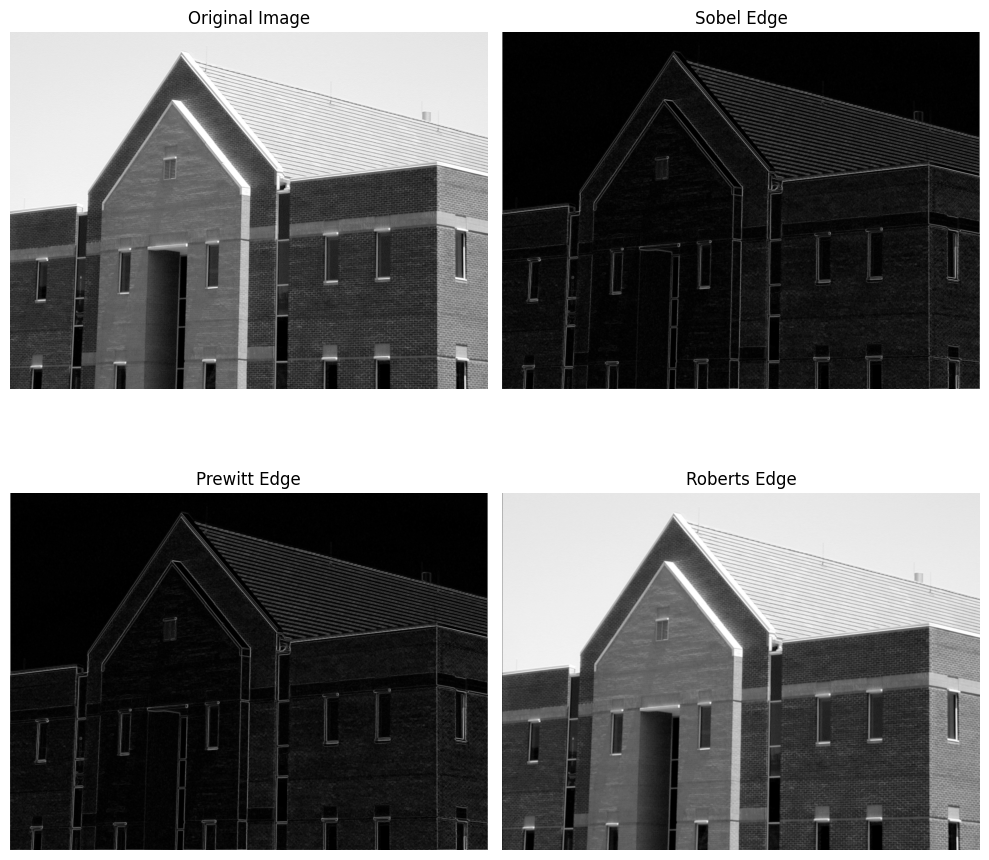

In [25]:
Image = cv2.imread('building.tif', cv2.IMREAD_GRAYSCALE)

sobel_edge = sobel(Image)
prewitt_edge = prewitt(Image)
roberts_edge = robert(Image)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(Image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_edge, cmap='gray')
plt.title("Sobel Edge")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(prewitt_edge, cmap='gray')
plt.title("Prewitt Edge")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Edge')
plt.axis('off')

plt.tight_layout()
plt.show()
